## Internship Task on Linear Regression (with Polynomial Features)

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

# To execute the multiple lines at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
   

In [2]:
boston = load_boston()

print(type(boston))

<class 'sklearn.utils.Bunch'>


### Understanding and Viz

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
df = pd.DataFrame(boston.data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
df.columns=boston.feature_names

In [8]:
df['Price'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


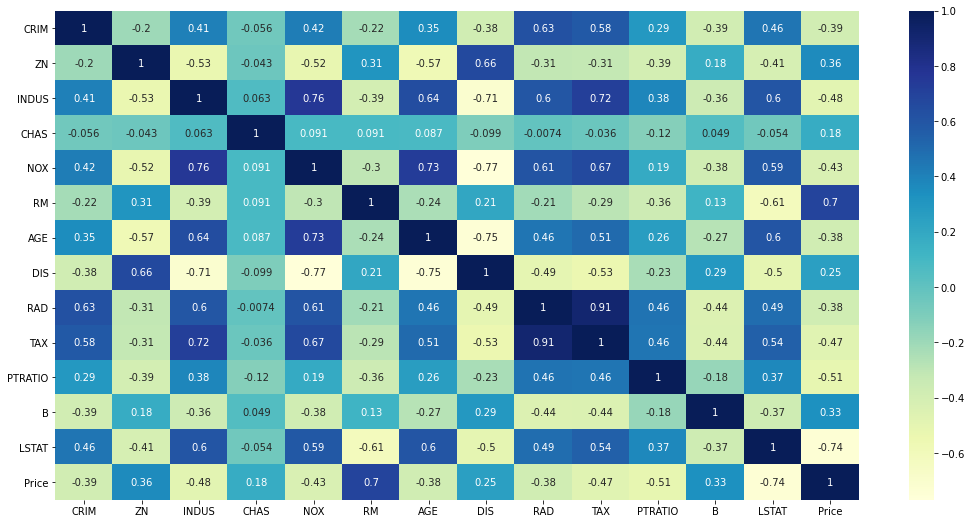

In [11]:
plt.figure(figsize=(18, 9))

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu");

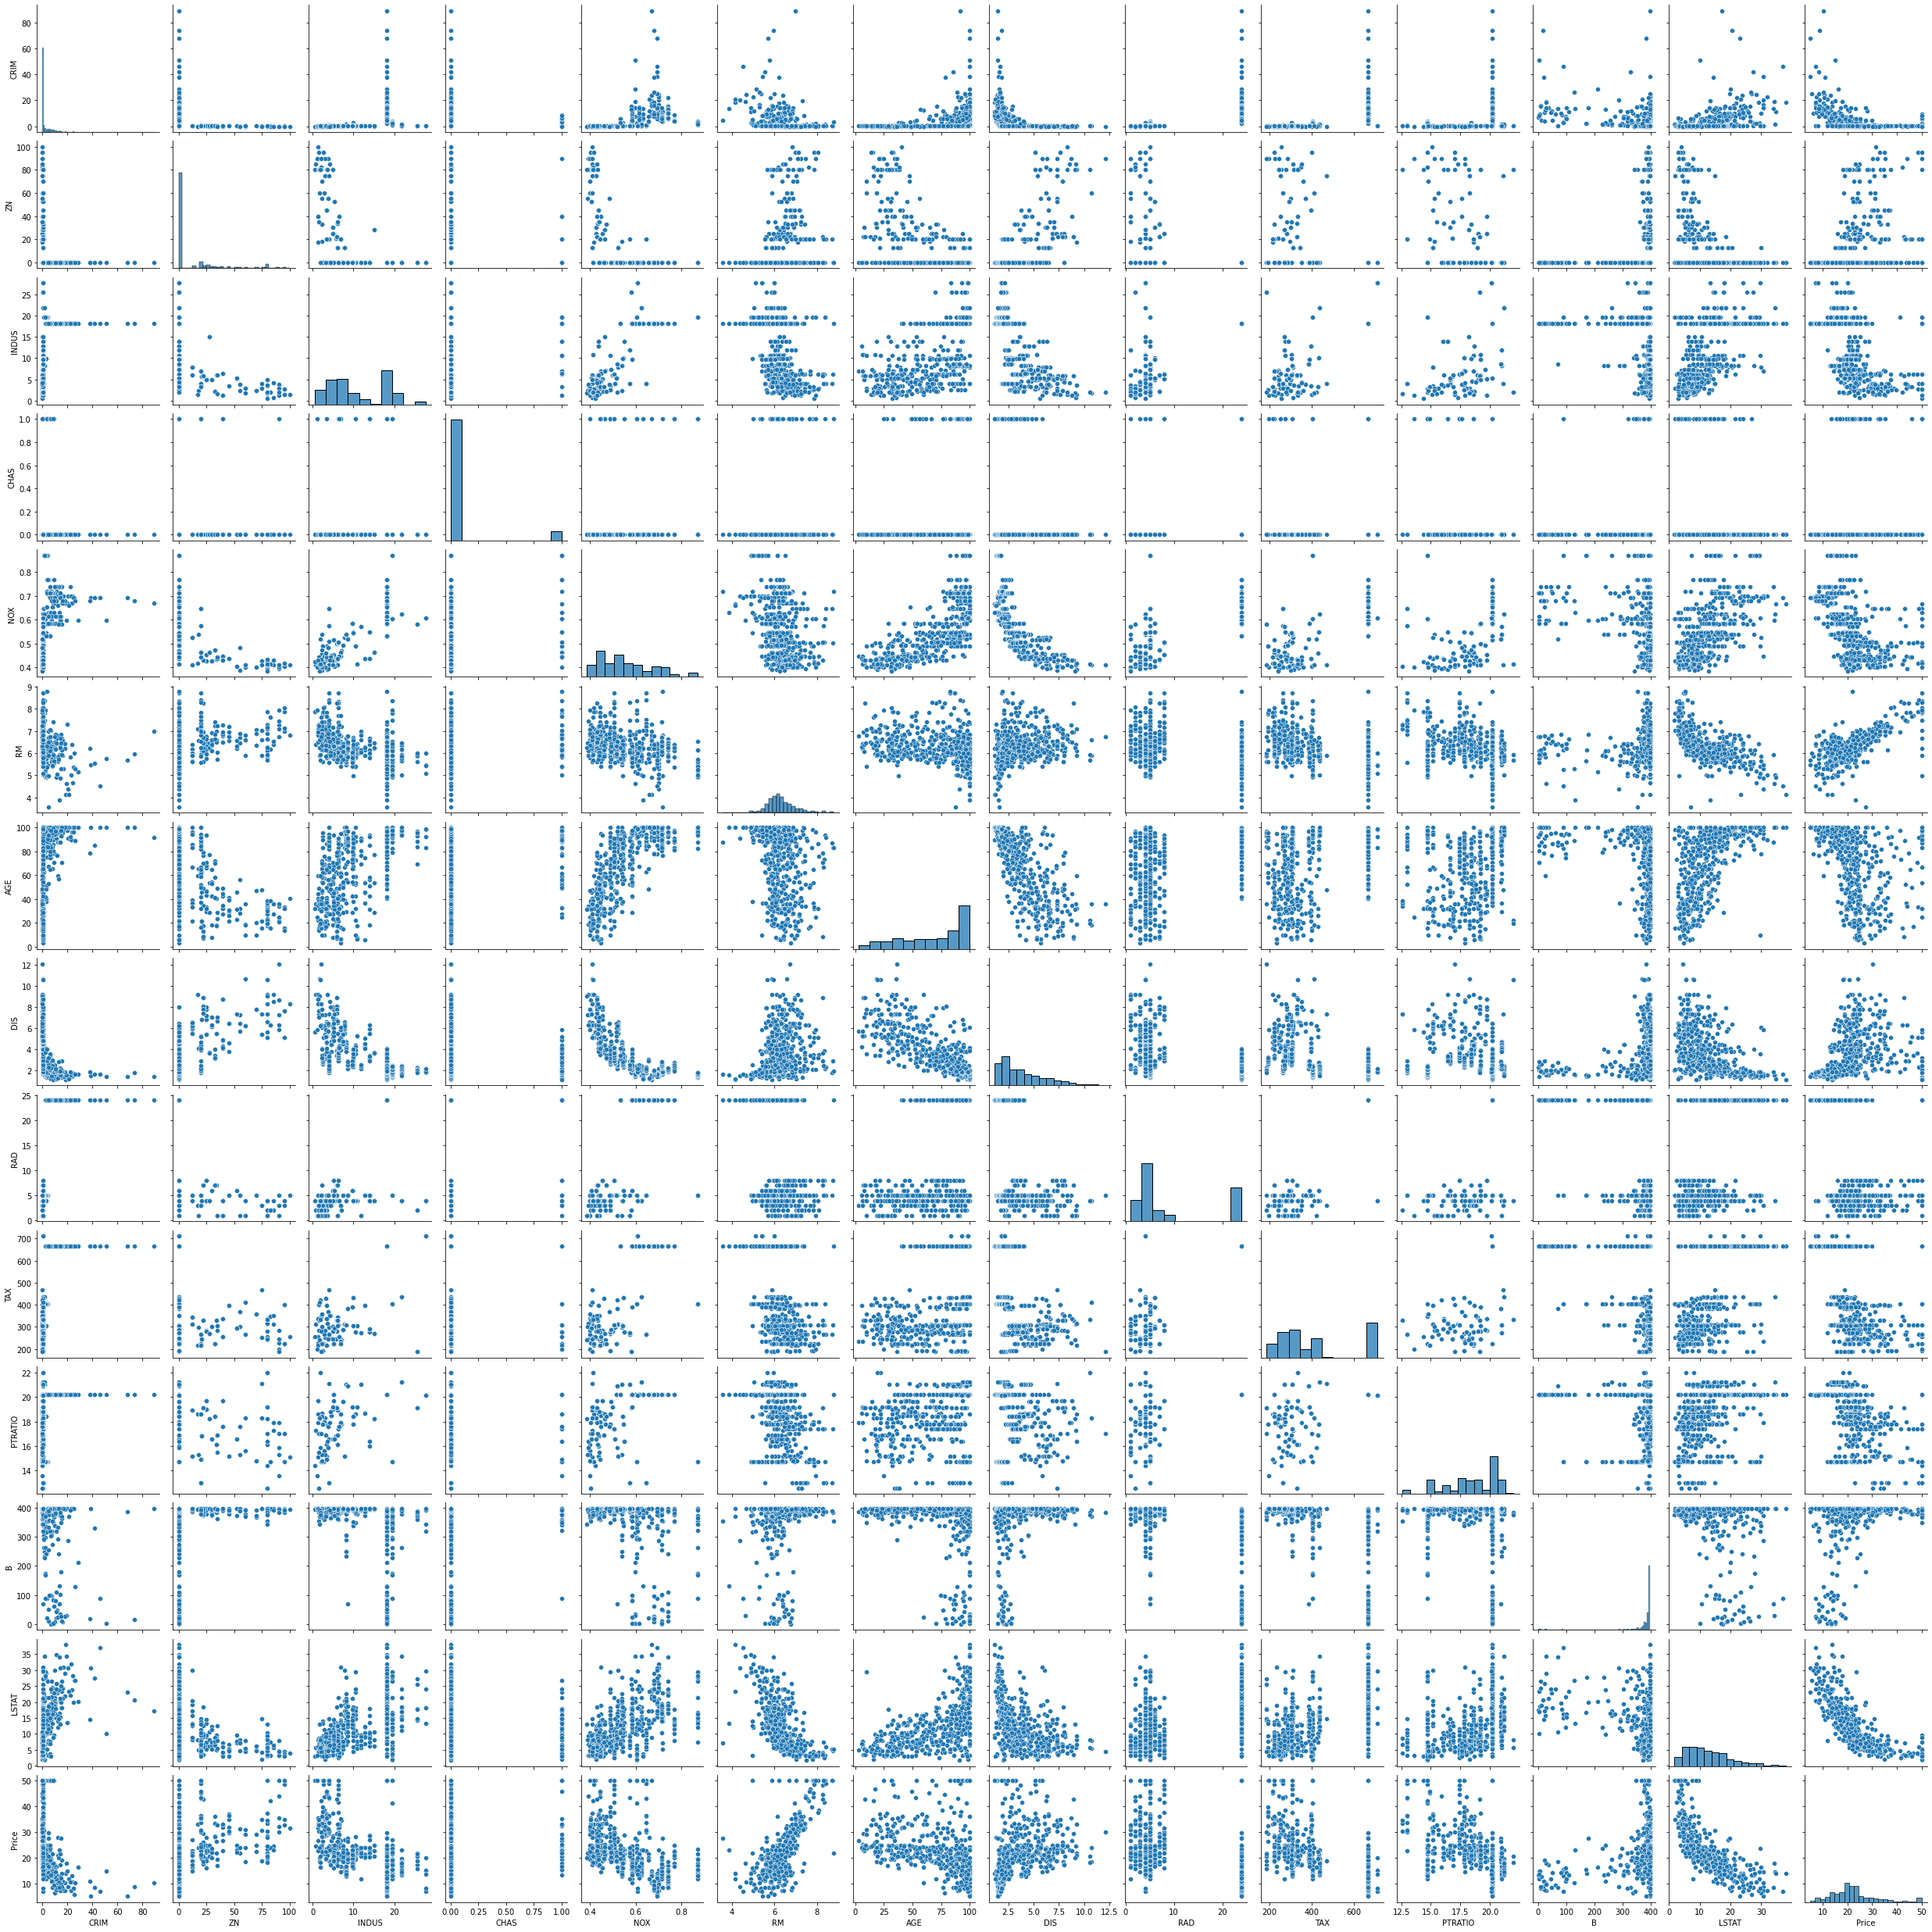

In [12]:
sns.pairplot(df);

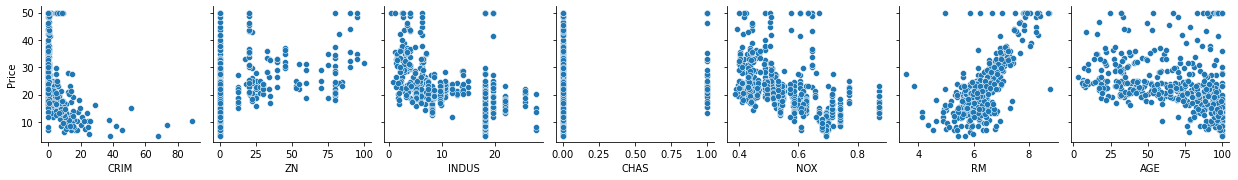

In [13]:
sns.pairplot(data = df,
            x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'],
            y_vars = 'Price');

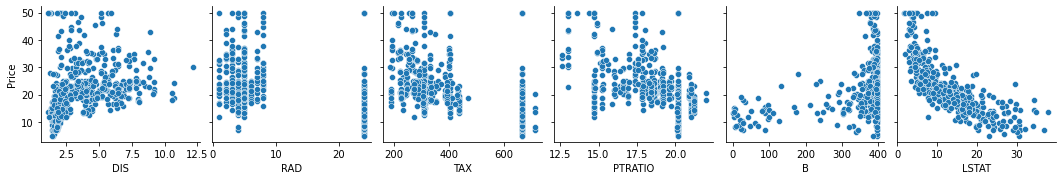

In [14]:
sns.pairplot(data = df,
            x_vars = ['DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
            y_vars = 'Price');

### Data Preparation

In [15]:

# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(404, 14)
(102, 14)


### Training

In [16]:
y_train = df_train.pop('Price')
X_train = df_train

In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [18]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

### Residual Analysis on Training Data

In [19]:
y_train_pred = model_1.predict(X_train)

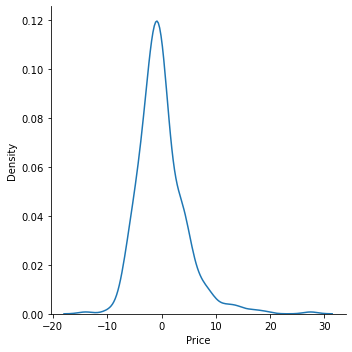

In [20]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

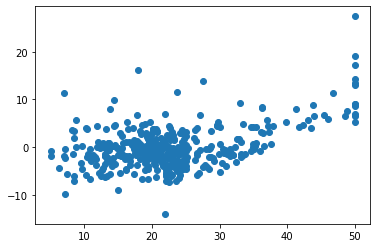

In [21]:
plt.scatter(y_train, residual);

plt.show()

### Making Prediction

In [22]:
y_test = df_test.pop('Price')
X_test = df_test

In [23]:
y_test_pred = model_1.predict(X_test)

In [24]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


### Evaluation

In [25]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.842909220444504
Mean Squared Error:  33.44897999767649
Root Mean Squared Error:  5.783509315085132


In [26]:
print(metrics.r2_score(y_test, y_test_pred))

0.5892223849182514


In [27]:
residual_test = y_test - y_test_pred

<AxesSubplot:xlabel='Price'>

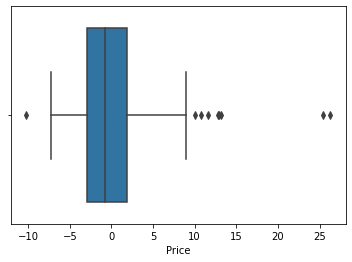

In [28]:
sns.boxplot(x=residual_test)

---------------------------------------------------------------------------------------------------------
Now let's try to do below mentioned experiments and try to improve the model performance
---------------------------------------------------------------------------------------------------------

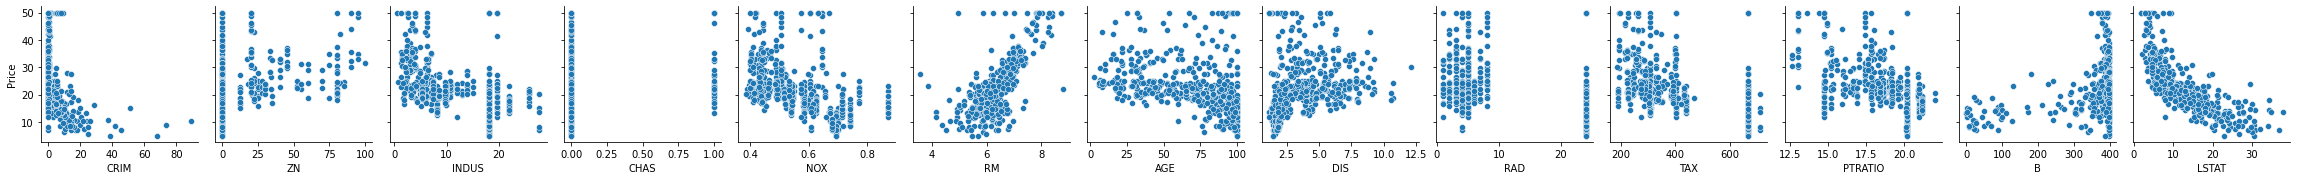

In [29]:
sns.pairplot(data = df,
            x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
            y_vars = 'Price');

#### Observation:
* To fit a linear regression model, we select those features which have a high correlation with our target variable Price.
* By looking at the correlation matrix we can see that **RM** has a strong positive correlation with Price(0.7) where as **LSTAT** has a high negative correlation with Price(-0.74).
* RM and LSTAT has strong correlation so we took those 2 variables to analyze

### Step 1 - Try to perform the exploratory data analysis and observe the relationships between Dependent and Independent variables. If you do a proper analysis, you will find out that RM and LSTAT are having strong relationship with MEDV or Price column. Plot proper graphs to show that relationship.

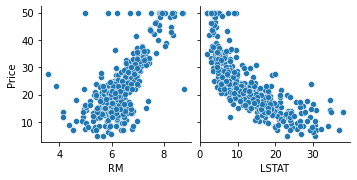

In [30]:
sns.pairplot(data = df,
            x_vars = ['RM', 'LSTAT'],
            y_vars = 'Price');

### Observation:
* The price increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
* The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

<AxesSubplot:xlabel='Price', ylabel='Density'>

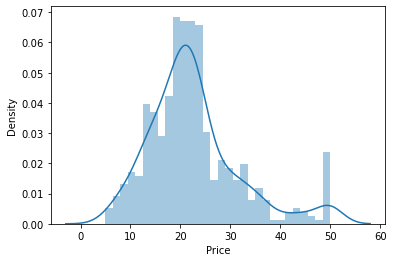

In [31]:
sns.distplot(df['Price'], bins=30)
plt.show()

Here ...Values of Price are distributed normally with few outliers.

### Step 2 - Out of all 14 columns use only RM, LSTAT and Price, and fit the model (you can name it model_2) to predict Price. Observe the model_2 error on test data and compare it with the model_1 that is already trained above.
To perform this I follow these steps:

1. Normalisation/Standardisation
2. Perform train test split
3. Fit the model_2
4. Residual Analysis on train data
5. Prediction
6. Evaluation (use RMSE, MAE, MSE and R_Square)
7. Comparision with model_1

### Data-preprocessing: Standardizing the data

In [32]:
# # Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data.shape)

(506, 14)


In [33]:
standardized_data

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [34]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
data=pd.DataFrame(standardized_data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [36]:
data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT','Price']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [37]:
target=data['Price']
independent_features=['RM', 'LSTAT']
std_data=data.loc[:,independent_features]

### Train-Test split


In [38]:
# Using sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(std_data,target,train_size=0.8,random_state=0)
X_train.shape

(404, 2)

In [39]:
print(X_train.shape,Y_train.shape,X_test.shape, Y_test.shape)

(404, 2) (404,) (102, 2) (102,)


### Training the model or (Fit the model_2)

In [40]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)

LinearRegression()

In [41]:
print('y intercept: ',model_2.intercept_)

y intercept:  0.002849781335268093


In [42]:
print('slope: ',model_2.coef_)

slope:  [ 0.39030972 -0.50853286]


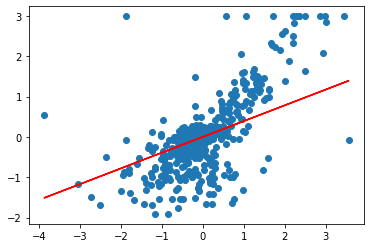

In [43]:
plt.scatter(X_train.loc[:,'RM'], Y_train)

plt.plot(X_train.loc[:,'RM'],  0.002849781335268093 + 0.39030972 * X_train.loc[:,'RM'], 'r')

plt.show()

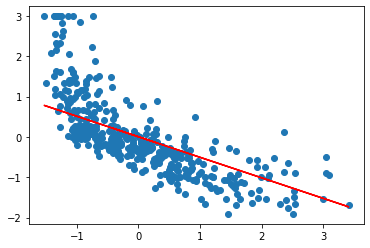

In [44]:
plt.scatter(X_train.loc[:,'LSTAT'], Y_train)

plt.plot(X_train.loc[:,'LSTAT'],  0.002849781335268093 -0.50853286 * X_train.loc[:,'LSTAT'], 'r')

plt.show()

### Residual Analysis on Training Data


In [45]:
Y_train_pred = model_2.predict(X_train);
residual = Y_train - Y_train_pred

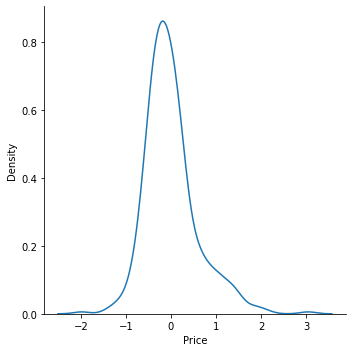

In [46]:
sns.displot(residual, kind='kde');

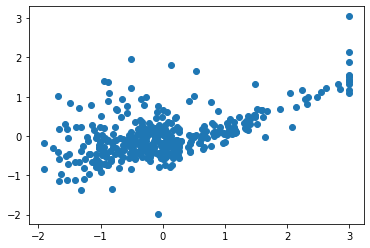

In [47]:
plt.scatter(Y_train, residual);

plt.show()

### Making Prediction


In [48]:
Y_test_pred = model_2.predict(X_test)

In [49]:
Y_test.shape
Y_test_pred.shape

(102,)

(102,)

In [50]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
temp_df

,Actual,Predicted
329,0.007313,0.408475
371,2.989460,0.187306
219,0.050848,0.205463
403,-1.549063,-1.024734
78,-0.145059,-0.004102
...,...,...
56,0.235872,0.548192
455,-0.917805,-0.253905
60,-0.417153,-0.334866
213,0.605919,0.286412


Text(0.5, 0, 'Y Test')

Text(0, 0.5, 'Predicted Y')

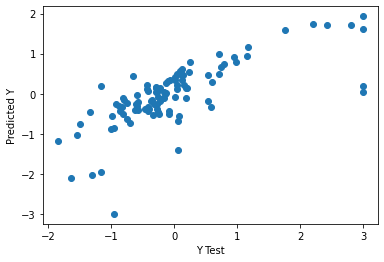

In [51]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluation

In [52]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

Mean Absolute Error:  0.45085322714547504
Mean Squared Error:  0.4428251857854585
Root Mean Squared Error:  0.6654511144971196


In [53]:
print(metrics.r2_score(Y_test, Y_test_pred))

0.5409084827186417


In [54]:
residual_test1= Y_test - Y_test_pred

### Comparision with model-1

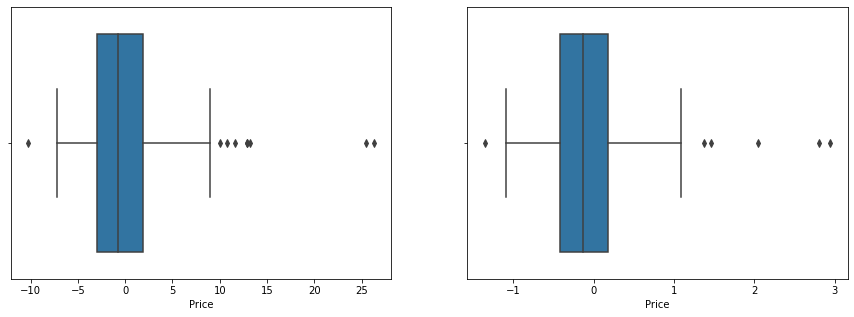

In [55]:
#Model-1 boxplot
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x=residual_test);
plt.subplot(122)
sns.boxplot(x=residual_test1);

### Observation:
    While comparing the two models....in model 2 the outliers are reduced becausse of taking only 3 features

### Step-3 - Perform polynomial transformations with degree 2, 3, 4, 5, 6 and 7 on RM and LSTAT column, and try to predict the Price. Compare with above models.

1. Normalisation/Standardisation
2. Perform train test split
3. Use polynomial transformation in X_train
4. Fit the model
5. Residual Analysis on train data
6. Use polynomial transformation in X_test
7. Prediction
8. Evaluation (use RMSE, MAE, MSE and R_Square) 

### Data-preprocessing: Standardizing the data

In [56]:
from sklearn.preprocessing import StandardScaler
features=['RM', 'LSTAT','Price']
standardized_data = StandardScaler().fit_transform(df.loc[:,features])
print(standardized_data.shape)

(506, 3)


In [57]:
data1=pd.DataFrame(standardized_data)
data1.columns=['RM', 'LSTAT','Price']
data1

,RM,LSTAT,Price
0,0.413672,-1.075562,0.159686
1,0.194274,-0.492439,-0.101524
2,1.282714,-1.208727,1.324247
3,1.016303,-1.361517,1.182758
4,1.228577,-1.026501,1.487503
...,...,...,...
501,0.439316,-0.418147,-0.014454
502,-0.234548,-0.500850,-0.210362
503,0.984960,-0.983048,0.148802
504,0.725672,-0.865302,-0.057989


In [58]:
target=data1['Price']
independent_features=['RM', 'LSTAT']
standardize_data=data1.loc[:,independent_features]

### Train-Test split

In [59]:
# Using sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(standardize_data,target,train_size=0.8,random_state=0)
X_train.shape
Y_train.shape

(404, 2)

(404,)

### Use polynomial transformation in X_train and Fit the model

In [60]:
#polynomial transformation in X_train

from sklearn.preprocessing import PolynomialFeatures

poly_deg_2 = PolynomialFeatures(degree=2)

X_train_pd2 = poly_deg_2.fit_transform(X_train)

#Fit the model
model_pd2 = LinearRegression()

model_pd2.fit(X_train_pd2, Y_train)

LinearRegression()

### Residual Analysis on Training Data


In [61]:
Y_train_pred = model_pd2.predict(X_train_pd2);
residual = Y_train - Y_train_pred

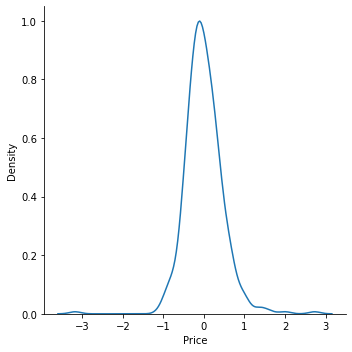

In [62]:
sns.displot(residual, kind='kde');

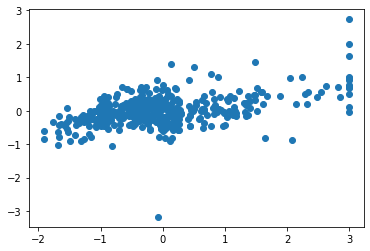

In [63]:
plt.scatter(Y_train, residual);

plt.show()

### Making Prediction

In [64]:
X_test_pd2 = poly_deg_2.transform(X_test)
Y_test_pred_pd2 = model_pd2.predict(X_test_pd2)

In [65]:
temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred_pd2})
temp_df

,Actual,Predicted
329,0.007313,0.330896
371,2.989460,0.044901
219,0.050848,0.014967
403,-1.549063,-0.836604
78,-0.145059,-0.223538
...,...,...
56,0.235872,0.534760
455,-0.917805,-0.662650
60,-0.417153,-0.414798
213,0.605919,0.132841


### Evalution:

In [66]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_test_pred_pd2))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_test_pred_pd2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_pd2)))
print('R-square value: ',metrics.r2_score(Y_test, Y_test_pred_pd2))

Mean Absolute Error:  0.3636824173232575
Mean Squared Error:  0.3333939805494729
Root Mean Squared Error:  0.5774027888307025
R-square value:  0.6543594328054245


In [67]:
residual_test2= Y_test - Y_test_pred_pd2

<AxesSubplot:xlabel='Price'>

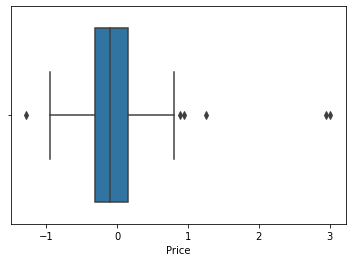

In [68]:
sns.boxplot(x=residual_test2)

In [69]:
res_df = pd.DataFrame({'res_model2': residual_test1, 'res_model_pd2': residual_test2})

res_df.head()

,res_model2,res_model_pd2
329,-0.401162,-0.323583
371,2.802154,2.944559
219,-0.154615,0.035881
403,-0.524329,-0.712458
78,-0.140957,0.078478


<AxesSubplot:>

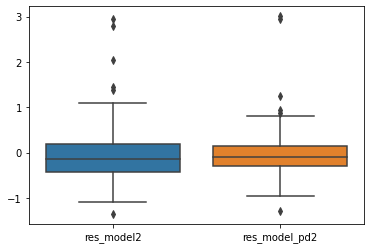

In [70]:
sns.boxplot(data = res_df)

### Instead of writing the above code again and again for each degree (2, 3, 4, 5, 6 and 7), i try to create a python function which can do all the above tasks. This way redundant code will be reduced.

In [71]:
df1=df[['RM','LSTAT','Price']]
df1

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


degree 1


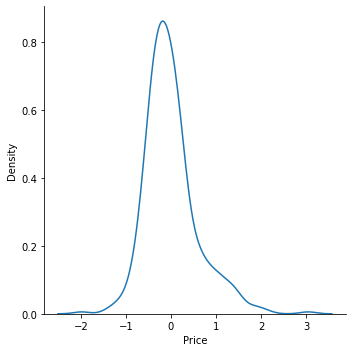

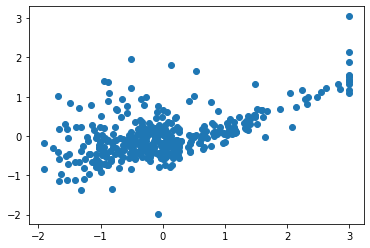

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.45085322714547504
Mean Squared Error:  0.4428251857854585
Root Mean Squared Error:  0.6654511144971196
R-square value:  0.5409084827186417
degree 2


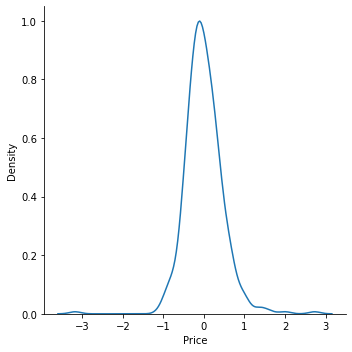

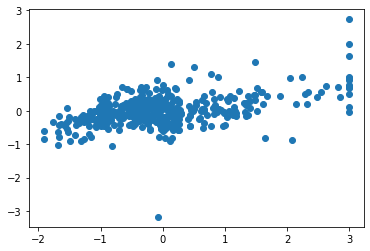

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.3636824173232575
Mean Squared Error:  0.3333939805494729
Root Mean Squared Error:  0.5774027888307025
R-square value:  0.6543594328054245
degree 3


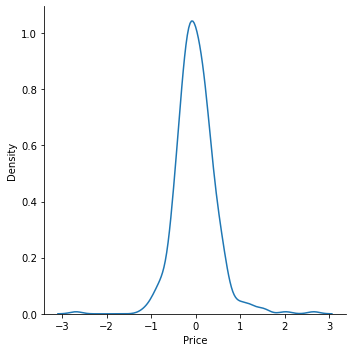

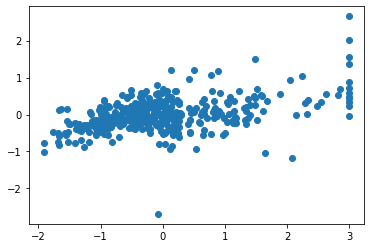

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.3553956148377163
Mean Squared Error:  0.33839512710136477
Root Mean Squared Error:  0.5817173945322288
R-square value:  0.6491745787538601
degree 4


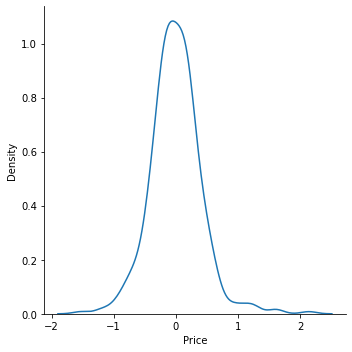

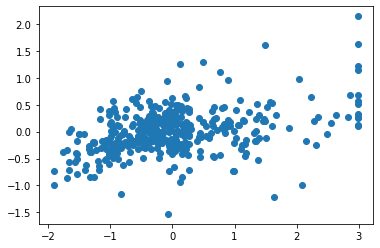

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.39620241018614477
Mean Squared Error:  0.40274120032430616
Root Mean Squared Error:  0.6346189410380896
R-square value:  0.5824648762905283
degree 5


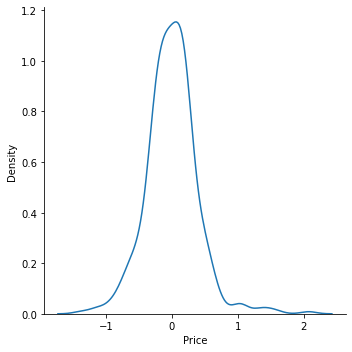

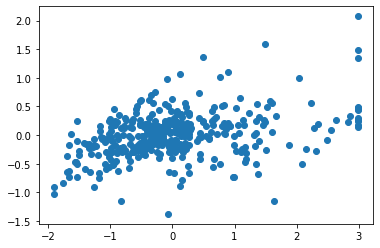

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.3716691925358853
Mean Squared Error:  0.4051360818759841
Root Mean Squared Error:  0.6365030101075596
R-square value:  0.579982023371224
degree 6


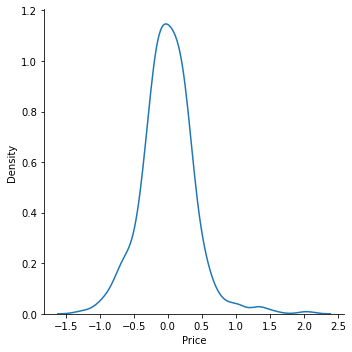

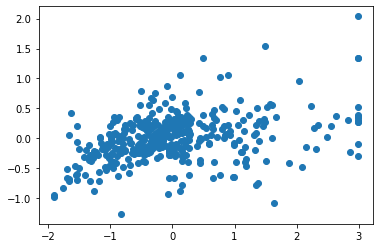

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.3645767174838175
Mean Squared Error:  0.39057447297815523
Root Mean Squared Error:  0.6249595770753139
R-square value:  0.595078524964972
degree 7


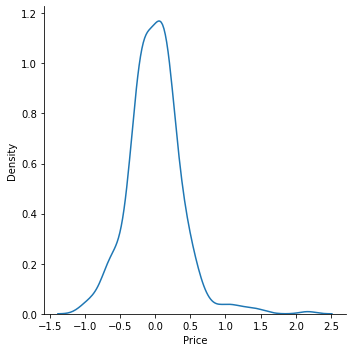

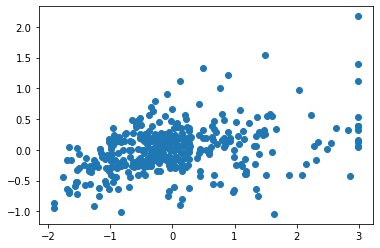

       Actual  Predicted
329  0.007313   0.408475
371  2.989460   0.187306
219  0.050848   0.205463
403 -1.549063  -1.024734
78  -0.145059  -0.004102
..        ...        ...
56   0.235872   0.548192
455 -0.917805  -0.253905
60  -0.417153  -0.334866
213  0.605919   0.286412
108 -0.297432   0.135454

[102 rows x 2 columns]
Mean Absolute Error:  0.3987172799170301
Mean Squared Error:  0.5547039223174658
Root Mean Squared Error:  0.7447844804488516
R-square value:  0.4249200959811157


In [80]:
def polynomial_feature(*a):
    for i in a:
        df1=df[['RM','LSTAT','Price']]
        from sklearn.preprocessing import StandardScaler
        standardized_data = StandardScaler().fit_transform(df1)
        data1=pd.DataFrame(standardized_data)
        
        from sklearn.model_selection import train_test_split
        X_train,X_test, Y_train, Y_test=train_test_split(standardize_data,target,train_size=0.8,random_state=0)
        
        #polynomial transformation in X_train

        from sklearn.preprocessing import PolynomialFeatures

        poly_deg_2 = PolynomialFeatures(degree=i)

        X_train_pd2 = poly_deg_2.fit_transform(X_train)

        #Fit the model
        model_pd2 = LinearRegression()

        model_pd2.fit(X_train_pd2, Y_train)
        
        # residual analysis
        Y_train_pred = model_pd2.predict(X_train_pd2);
        residual = Y_train - Y_train_pred
        print(f'degree {i}')
        sns.displot(residual, kind='kde');        
        plt.show()
        plt.scatter(Y_train, residual);

        plt.show()
        temp_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
        print(temp_df)
        
        #Prediction
        X_test_pd2 = poly_deg_2.transform(X_test)
        Y_test_pred_pd2 = model_pd2.predict(X_test_pd2)
        
        #Evalution
        from sklearn import metrics
        print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_test_pred_pd2))
        print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_test_pred_pd2))
        print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_pd2)))
        print('R-square value: ',metrics.r2_score(Y_test, Y_test_pred_pd2))
        
        residual_test2= Y_test - Y_test_pred_pd2
polynomial_feature(1,2,3,4,5,6,7)        

### Step 4 - Compare all the models (i.e. model_1, model_2, model_pd2, model_pd3, model_pd4, model_pd5, model_pd6 and model_pd7). Plot relavant graphs and tables to compare all these models. As an end note also mention the model that you will prefer.

R-square value for polynomial degree 1:   0.5409084827186417
R-square value for polynomial degree 2:   0.6543594328054245
R-square value for polynomial degree 3:   0.6491745787538601
R-square value for polynomial degree 4:   0.5824648762905283
R-square value for polynomial degree 5:   0.579982023371224
R-square value for polynomial degree 6:   0.595078524964972
R-square value for polynomial degree 7:   0.4249200959811157


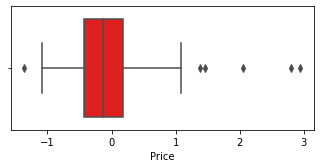

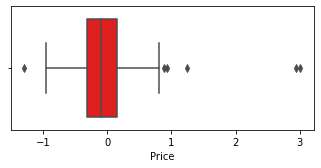

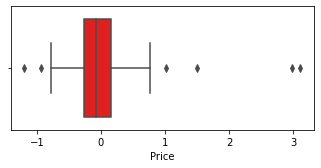

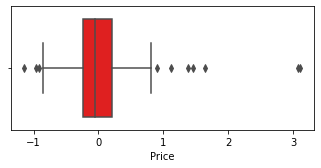

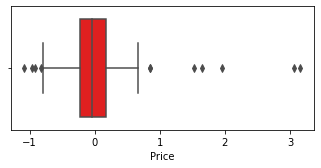

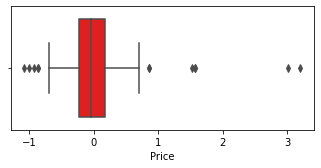

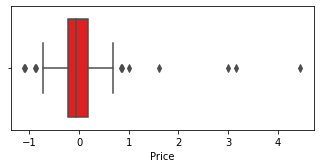

In [73]:
def polynomial_feature(*a):
    for i in a:
        df1=df[['RM','LSTAT','Price']]
        from sklearn.preprocessing import StandardScaler
        standardized_data = StandardScaler().fit_transform(df1)
        data1=pd.DataFrame(standardized_data)
        
        from sklearn.model_selection import train_test_split
        X_train,X_test, Y_train, Y_test=train_test_split(standardize_data,target,train_size=0.8,random_state=0)
        
        #polynomial transformation in X_train

        from sklearn.preprocessing import PolynomialFeatures

        poly_deg_2 = PolynomialFeatures(degree=i)

        X_train_pd2 = poly_deg_2.fit_transform(X_train)

        #Fit the model
        model_pd2 = LinearRegression()

        model_pd2.fit(X_train_pd2, Y_train)
        
        # residual analysis
        Y_train_pred = model_pd2.predict(X_train_pd2);
        residual = Y_train - Y_train_pred

        #Prediction
        X_test_pd2 = poly_deg_2.transform(X_test)
        Y_test_pred_pd2 = model_pd2.predict(X_test_pd2)
        residual_test= Y_test - Y_test_pred_pd2
        #Model-1 boxplot
        plt.figure(figsize=(25,5))
        plt.subplot(2,4,i)
        sns.boxplot(x=residual_test,color="red");
        print('\033[1m' + f'R-square value for polynomial degree {i}: ' + '\033[0m ',metrics.r2_score(Y_test, Y_test_pred_pd2))
        
polynomial_feature(1,2,3,4,5,6,7)        
        

## Observation:
    a. Out of all R-Squared values...for polynomial degree 2  and 3 R-square value is nearly 0.65 which is more and best among of all degrees
    b. And also in the boxplots plotting ...the second plot which is degree 2 has less outliers of all remaining plots

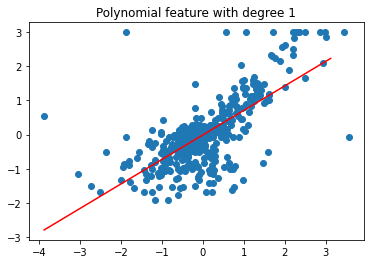

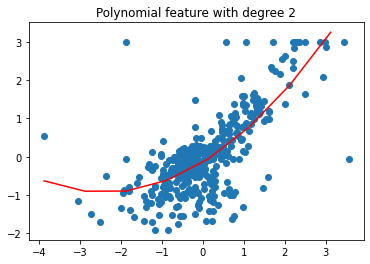

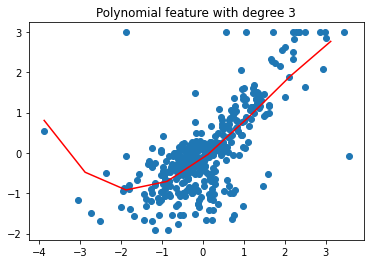

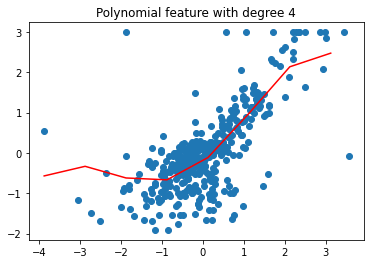

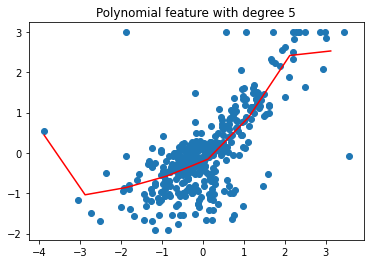

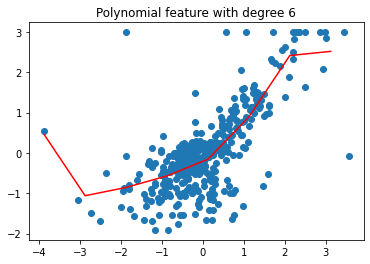

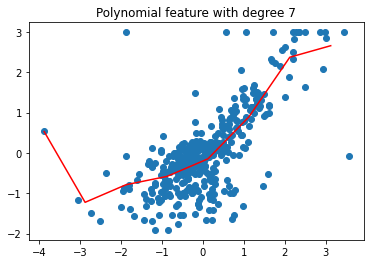

In [74]:
from numpy import arange

from scipy.optimize import curve_fit
 
# define the true objective function
def objective(x, a,h):
    return (a * x)+h
 

x, y = X_train.loc[:,"RM"],Y_train
# curve fit
popt, _  = curve_fit(objective, x, y)
# summarize the parameter values
a,h = popt
# plot input vs output
plt.scatter(x, y);
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a,h)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 1')
plt.show();

#degree 2
def objective(x, a,b,h):
    return (a * x) +(b * x**2)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,h = popt
plt.scatter(x, y);
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 2')
plt.show();

#degree 3
def objective(x, a,b,c,h):
    return (a * x) +(b * x**2)+(c * x**3)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,c,h = popt
plt.scatter(x, y);
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,c,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 3')
plt.show();


#degree 4
def objective(x, a,b,c,d,h):
    return (a * x) +(b * x**2)+(c * x**3)+(d * x**4)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,c,d,h = popt
plt.scatter(x, y);
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,c,d,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 4')
plt.show();


#degree 5
def objective(x, a,b,c,d,e,h):
    return (a * x) +(b * x**2)+(c * x**3)+(d * x**4)+(e * x**5)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,c,d,e,h = popt
plt.scatter(x, y);
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,c,d,e,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 5')
plt.show();


#degree 6
def objective(x, a,b,c,d,e,f,h):
    return (a * x) +(b * x**2)+(c * x**3)+(d * x**4)+(e * x**5)+(f * x**6)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,c,d,e,f,h = popt
plt.scatter(x, y);
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,c,d,e,f,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 6')
plt.show();


#degree 7
def objective(x, a,b,c,d,e,f,g,h):
    return (a * x) +(b * x**2)+(c * x**3)+(d * x**4)+(e * x**5)+(f * x**6)+(g * x**7)+h
x, y = X_train.loc[:,"RM"],Y_train
popt, _  = curve_fit(objective, x, y)
a,b,c,d,e,f,g,h = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a,b,c,d,e,f,g,h)
plt.plot(x_line, y_line, color='red');
plt.title('Polynomial feature with degree 7')
plt.show();


### Observation: 
      Finally I prefer polynomial degree 2 and 3 out of all degrees....Because
      1.The residuals are low 
      2.There is very less outliers 
      3.The R-Square is high
      4.Curve fitted with low bias and low variance
                        when compared to remaining all degrees
      and these are more generalized models ....I prefer model2_pd2 FIRST after that model2_pd3